# **1) Create *`yolov4`* and *`training`* folders in your drive**

 Create a folder named ***yolov4*** in your drive. 
 
 Next, create another folder named ***training*** inside the ***yolov4*** folder. This is where we will save our trained weights (This path is mentioned in the ***obj.data*** file which we will upload later) 


# **2) Mount drive, link your folder and navigate to /mydrive/yolov4 folder**

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/yolov4
%cd /mydrive/yolov4

/content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'Colab Notebooks'  ' QUANTRIUM TRAINING WEEK.gdoc'   Train_test
'My Drive'	   'Training Week'		     yolov4
/content/gdrive/My Drive/yolov4


# **3) Clone `darknet` git repository** 

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

# **4) Create & upload the following files which we need for training a custom detector**


a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data and obj.names files` 

d.   `process.py file (to create train.txt and test.txt files for training)`


**I have uploaded my custom files on [GitHub](https://github.com/Bavesh-B/Mask_Detection).
I am working with 2 classes i.e. with_mask and without_mask**




## **4(a) Upload the Labeled custom dataset *`obj.zip`* file to the *`yolov4`* folder on your drive**


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov4*** folder on your drive.

To know more about collecting datasets and labeling, read TechZizou's [Medium article](https://medium.com/@techzizou007/image-dataset-labeling-annotation-bec3390eda2d) on this.


## **4(b) Create your custom *`config`* file and upload it to your drive**

Download the **yolov4-custom.cfg** file from ***darknet/cfg*** directory, make changes to it, and upload it to the ***yolov4*** folder on your drive .

You can also download the custom config file from the official [AlexeyAB Github](https://www.github.com/AlexeyAB/darknet)


**You need to make the following changes in your custom config file:**

*   change line batch to batch=32
*   change line subdivisions to subdivisions=8
*   change line max_batches to (classes*2000 but not less than number of training images and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
*    change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
*    set network size width=416 height=416 or any value multiple of 32
*    change line classes=80 to your number of objects in each of 3 [yolo]-layers
*    change [filters=255] to filters=(classes + 5)x3 in the 3 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers.
     So if classes=1 then it should be filters=18. If classes=2 then write filters=21.

If getting a CUDA memory error, you will have to reduce batch and subdivisions.



## **4(c) Create your *`obj.data`* and *`obj.names`* files and upload to your drive**



## **4(d) Upload the *`process.py`* script file to the *`yolov4`* folder on your drive**

**To divide all image files into 2 parts. 90% for train and 10% for test.**

This *`process.py`* script creates the files *`train.txt`* & *`test.txt`* where the *`train.txt`* file has paths to 90% of the images and *`test.txt`* has paths to 10% of the images.

You can download the ***`process.py`*** script from my [GitHub](https://github.com/Bavesh-B/Mask_Detection).

# **5) Make changes in the `makefile` to enable OPENCV and GPU**

In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4/darknet


# **6) Run `make` command to build darknet**

In [ ]:
# build darknet 
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# **7) Copy all the files from the *`yolov4`* folder to the darknet directory**

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
# Unzip the obj.zip dataset and its contents so that they are now in /darknet/data/ folder 

!unzip /mydrive/yolov4/obj.zip -d data/

In [ ]:
# Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder 

!cp /mydrive/yolov4/yolov4-custom.cfg cfg

# verify if your custom file is in cfg folder
!ls cfg/

In [ ]:
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder 

!cp /mydrive/yolov4/obj.names data
!cp /mydrive/yolov4/obj.data  data

# verify if the above files are in data folder
!ls data/

In [ ]:
# Copy the process.py file to the current darknet directory 

!cp /mydrive/yolov4/process.py .

# **8) Run the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

# **9) Download the pre-trained *`yolov4`* weights**

In [ ]:
# Download the yolov4 pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# **10) TRAINING**

## **Train your custom detector** 

For best results, you should stop the training when the average loss is less than 0.05 if possible or at least below 0.3, else train the model until the average loss does not show any significant change for a while.

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

### **<ins>NOTE</ins>:** If you get disconnected or lose your session for some reason you have to run steps 2, 5, and 6 again to mount the drive, edit makefile and build darknet every single time, otherwise the darknet executable will not work.

## **To restart your training (In case the training does not finish and you get disconnected)**

If you get disconnected or lose your session, you don't have to start training your model from scratch again. You can restart training from where you left off. Use the weights that were saved last. The weights are saved every 100 iterations as ***yolov4-custom_last.weights*** in the ***yolov4/training*** folder on your drive. (The path we gave as backup in "obj.data" file).


### **So to restart training run only Steps 2, 5, 6 and then run the following command**

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights -dont_show -map


Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000242, iou_loss = 0.000000, total_loss = 0.000242 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.907418), count: 4, class_loss = 0.000225, iou_loss = 1.547199, total_loss = 1.547424 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.908096), count: 9, class_loss = 0.032195, iou_loss = 1.046836, total_loss = 1.079032 
 total_bbox = 154068, rewritten_bbox = 0.005842 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.790721), count: 1, class_loss = 0.303818, iou_loss = 1.181966, total_loss = 1.485785 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.856157), count: 8, class_loss = 2.070560, iou_loss = 3.995450, total_loss = 6.066010 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls:

# **11) Check performance** 



In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


**Check the training chart**

In [ ]:
#only works if the training does not get interrupted
imShow('chart.png')

**Check mAP (mean average precision)**

In [ ]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_4000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

# **12) Test your custom Object Detector**

## **Make changes to your custom config file**
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

You can do it either manually or by simply running the code below

In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/My Drive/yolov4/darknet/cfg
/content/gdrive/My Drive/yolov4/darknet


## **Run detector on an image**

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

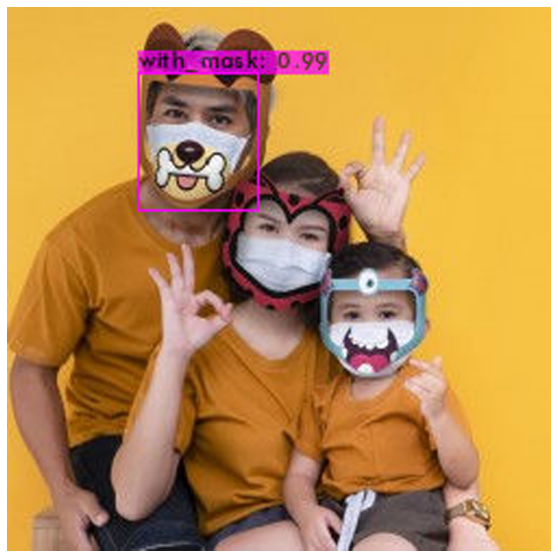

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/mask_test_images/image5.jpg -thresh 0.3 
imShow('predictions.jpg')